In [758]:
# !pip3 install Faker

In [759]:
import pandas as pd
import numpy as np
from faker import Faker

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Load Data

In [760]:
df_amazon_sale_report = pd.read_csv('./data/Amazon Sale Report.csv')
df_sale_report = pd.read_csv('./data/Sale Report.csv')

/var/folders/pf/z8gx8qw104xby0jdggl6xdnc0000gn/T/ipykernel_9795/2114885450.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_amazon_sale_report = pd.read_csv('./data/Amazon Sale Report.csv')


In [761]:
df_amazon_sale_report

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [762]:
df_sale_report

,index,SKU Code,Design No.,Stock,Category,Size,Color
0,0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red
...,...,...,...,...,...,...,...
9266,9266,NaN,NaN,NaN,NaN,NaN,NaN
9267,9267,NaN,NaN,NaN,NaN,NaN,NaN
9268,9268,NaN,NaN,NaN,NaN,NaN,NaN
9269,9269,NaN,NaN,NaN,NaN,NaN,NaN


In [763]:
df_amazon_sale_report.drop(['index', 'Unnamed: 22'], axis=1, inplace=True)
df_sale_report.drop(['index'], axis=1, inplace=True)

In [764]:
df_amazon_sale_report.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by'],
      dtype='object')

In [765]:
df_amazon_sale_report.columns = ['order_id', 'date', 'status', 'fulfilment', 'sales_channel',
       'ship_service_level', 'style', 'sku', 'category', 'size', 'asin',
       'courier_status', 'qty', 'currency', 'amount', 'ship_city',
       'ship_state', 'ship_postal_code', 'ship_country', 'promotion_ids',
       'b2b', 'fulfilled_by']
df_sale_report.columns = ['sku', 'design_no', 'stock', 'category', 'size', 'color']

## Clean Data

In [766]:
df_amazon_sale_report.isna().sum()

order_id                  0
date                      0
status                    0
fulfilment                0
sales_channel             0
ship_service_level        0
style                     0
sku                       0
category                  0
size                      0
asin                      0
courier_status         6872
qty                       0
currency               7795
amount                 7795
ship_city                33
ship_state               33
ship_postal_code         33
ship_country             33
promotion_ids         49153
b2b                       0
fulfilled_by          89698
dtype: int64

In [767]:
df_sale_report.isna().sum()

sku          83
design_no    36
stock        36
category     45
size         36
color        45
dtype: int64

In [768]:
# filter out missing value in df_sale_report['sku']
df_sale_report = df_sale_report[df_sale_report['sku'].notna()]
df_sale_report.isna().sum()

sku          0
design_no    0
stock        0
category     0
size         0
color        0
dtype: int64

In [769]:
df_sale_report

,sku,design_no,stock,category,size,color
0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red
...,...,...,...,...,...,...
9230,SET462-KR-NP-S,SET462,44.0,SET,S,Teal
9231,SET462-KR-NP-XL,SET462,58.0,SET,XL,Teal
9232,SET462-KR-NP-XS,SET462,20.0,SET,XS,Teal
9233,SET462-KR-NP-XXL,SET462,66.0,SET,XXL,Teal


In [770]:
df_sale_report = df_sale_report[df_sale_report['sku'] != '#REF!']
df_sale_report

,sku,design_no,stock,category,size,color
0,AN201-RED-L,AN201,5.0,AN : LEGGINGS,L,Red
1,AN201-RED-M,AN201,5.0,AN : LEGGINGS,M,Red
2,AN201-RED-S,AN201,3.0,AN : LEGGINGS,S,Red
3,AN201-RED-XL,AN201,6.0,AN : LEGGINGS,XL,Red
4,AN201-RED-XXL,AN201,3.0,AN : LEGGINGS,XXL,Red
...,...,...,...,...,...,...
9230,SET462-KR-NP-S,SET462,44.0,SET,S,Teal
9231,SET462-KR-NP-XL,SET462,58.0,SET,XL,Teal
9232,SET462-KR-NP-XS,SET462,20.0,SET,XS,Teal
9233,SET462-KR-NP-XXL,SET462,66.0,SET,XXL,Teal


In [771]:
df_amazon_sale_report = df_amazon_sale_report[df_amazon_sale_report['sku'].isin(df_sale_report['sku'])]
df_amazon_sale_report


,order_id,date,status,fulfilment,sales_channel,ship_service_level,style,sku,category,size,...,qty,currency,amount,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,...,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN
128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,...,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN
128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,...,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN
128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,...,1,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN


<AxesSubplot: ylabel='sales_channel'>

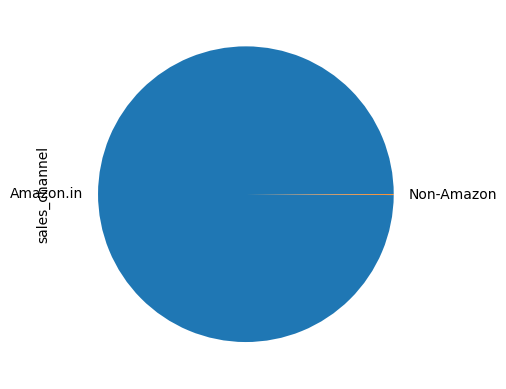

In [772]:
# plot sales_channel pie chart
df_amazon_sale_report['sales_channel'].value_counts().plot.pie()

In [773]:
fake = Faker('en-US')

df_generated_customer = pd.DataFrame(columns=['cid', 'name', 'lastname', 'email', 'phone', 'gender', 'birthdate', 'city', 'state', 'postal_code', 'account_type'])

According to this [source](https://www.investing.com/academy/statistics/amazon-facts/#:~:text=In%202022%2C%20Amazon%20has%20300,visit%20Amazon.com%20every%20month.), US Amazon has 300 active users.
With this and total Amazon Prime user of [168 million users](https://www.businessinsider.com/amazon-shopping-prime-membership-us-stopped-growing-first-time-ever-2023-1#:~:text=Amazon%20ended%20last%20year%20with,largest%20market%2C%20according%20to%20CIRP.)

In [774]:
prime_users_proportions = 168/300

In [775]:
# for i in range(1, int(0.5*len(df_amazon_sale_report))):
# # for i in range(1, 10):
#     acc_type = 'regular'
#     rnd = np.random.randint(0, 100)
#     gender = np.random.choice(["M", "F"], p=[0.5, 0.5])
#     name = fake.first_name_male() if gender=="M" else fake.first_name_female(),

#     if(rnd/100 >= prime_users_proportions):
#         acc_type = 'prime'


#     df_generated_customer = df_generated_customer.append(
#         {
#         'cid': i, 
#         'name': name[0],
#         'lastname': fake.last_name(),
#         'email': fake.email(), 
#         'phone': fake.phone_number(),
#         'gender': gender,
#         'birthdate': fake.date_of_birth(),
#         'city': fake.city(),
#         'state': fake.state(),
#         'postal_code': fake.postalcode(),
#         'account_type': acc_type
#          }, ignore_index=True)

# df_generated_customer

In [776]:
# df_generated_customer.to_csv('./data/generated_customer.csv', index=False)

In [777]:
df_generated_customer = pd.read_csv('./data/generated_customer.csv')
df_generated_customer

,cid,name,lastname,email,phone,gender,birthdate,city,state,postal_code,account_type
0,1,Debbie,Jimenez,josephmosley@example.com,(923)829-1098x92277,F,1990-11-06,North Williamton,Utah,81084,regular
1,2,Norman,Rodriguez,courtneysmith@example.net,563.562.1346,M,1981-02-03,South Nicoleview,Vermont,66020,regular
2,3,Stephanie,Singleton,wilsondavid@example.com,001-308-176-8872x1854,F,1993-05-14,Bensonshire,Mississippi,12935,prime
3,4,Mariah,Park,nrodriguez@example.com,359-240-4521,F,1965-02-02,East Barbaraborough,Indiana,75617,regular
4,5,Devin,Bernard,shawn55@example.org,940-922-1798x04604,M,2000-02-04,Brandonburgh,Virginia,73274,regular
...,...,...,...,...,...,...,...,...,...,...,...
60628,60629,Mario,Lopez,jonesjames@example.org,323-846-0067,M,1941-07-27,Mckaymouth,Maryland,79938,regular
60629,60630,Robert,Lee,bellmichael@example.net,001-144-001-7201x336,M,1987-11-14,North Mariaton,Alaska,33485,regular
60630,60631,Jennifer,Sherman,mercerjessica@example.com,619.070.9511,F,1926-03-24,New Johnburgh,Tennessee,39939,prime
60631,60632,Nicole,Miller,jenniferhill@example.net,001-722-811-2036x797,F,1978-01-18,Scottton,Iowa,34548,regular


In [778]:
df_amazon_sale_report.columns

Index(['order_id', 'date', 'status', 'fulfilment', 'sales_channel',
       'ship_service_level', 'style', 'sku', 'category', 'size', 'asin',
       'courier_status', 'qty', 'currency', 'amount', 'ship_city',
       'ship_state', 'ship_postal_code', 'ship_country', 'promotion_ids',
       'b2b', 'fulfilled_by'],
      dtype='object')

In [779]:
df_generated_customer.columns

Index(['cid', 'name', 'lastname', 'email', 'phone', 'gender', 'birthdate',
       'city', 'state', 'postal_code', 'account_type'],
      dtype='object')

In [780]:
length = len(df_amazon_sale_report)
rnd = np.random.randint(0, length)
rnd_df = df_amazon_sale_report.iloc[rnd].to_dict()
rnd_df

{'order_id': '403-2409300-0155532',
 'date': '04-24-22',
 'status': 'Shipped',
 'fulfilment': 'Amazon',
 'sales_channel': 'Amazon.in',
 'ship_service_level': 'Expedited',
 'style': 'JNE3784',
 'sku': 'JNE3784-KR-XXL',
 'category': 'kurta',
 'size': 'XXL',
 'asin': 'B09K3XZC3J',
 'courier_status': 'Shipped',
 'qty': 1,
 'currency': 'INR',
 'amount': 458.0,
 'ship_city': 'KOLKATA',
 'ship_state': 'WEST BENGAL',
 'ship_postal_code': 700084.0,
 'ship_country': 'IN',
 'promotion_ids': 'IN Core Free Shipping 2015/04/08 23-48-5-108',
 'b2b': False,
 'fulfilled_by': nan}

In [781]:
length = len(df_generated_customer)
df_generated_amazon_sale_report = pd.DataFrame(columns=df_amazon_sale_report.columns)

for index, row in df_amazon_sale_report.iterrows():
    # if(index> 1000):
    #     break
    rnd = np.random.randint(0, length)
    rnd_df = df_generated_customer.iloc[rnd].to_dict()
    
    if(row['fulfilled_by'] != 'Easy Ship'):
        row['fulfilled_by'] = ""+"Amazon"
    
    if(row['ship_country'] == 'IN'):
        row['ship_country'] = 'USA'
    
    row['ship_city'] = rnd_df['city']
    row['ship_state'] = rnd_df['state']
    row['ship_postal_code'] = rnd_df['postal_code']
    row['currency'] = 'USD'
    row['amount'] = row['amount'] * 0.012 # convert to USD from INR

    df_generated_amazon_sale_report = df_generated_amazon_sale_report.append(row, ignore_index=True)

In [782]:
df_generated_amazon_sale_report

,order_id,date,status,fulfilment,sales_channel,ship_service_level,style,sku,category,size,...,qty,currency,amount,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,0,USD,7.77144,South Pamela,Alabama,51041,USA,NaN,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,1,USD,4.87200,Lake Kristenland,Arizona,68276,USA,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,1,USD,3.94800,West Jessicaburgh,Louisiana,72591,USA,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Amazon
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,0,USD,9.03996,Port Elizabeth,Colorado,70997,USA,NaN,False,Easy Ship
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,1,USD,6.88800,Philipburgh,Hawaii,89844,USA,NaN,False,Amazon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121264,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,...,1,USD,6.20400,Port Todd,Montana,11373,USA,NaN,False,Amazon
121265,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,...,1,USD,11.98800,New Scottstad,Kentucky,8599,USA,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Amazon
121266,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,...,1,USD,8.28000,North Rhondahaven,North Dakota,47103,USA,NaN,False,Amazon
121267,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,...,1,USD,14.38800,New Lisa,Iowa,1954,USA,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Amazon


In [783]:
df_generated_amazon_sale_report[df_generated_amazon_sale_report.columns[0:10]]

,order_id,date,status,fulfilment,sales_channel,ship_service_level,style,sku,category,size
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL
...,...,...,...,...,...,...,...,...,...,...
121264,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL
121265,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M
121266,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL
121267,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS


In [784]:
df_generated_amazon_sale_report[df_generated_amazon_sale_report.columns[11:22]]

,courier_status,qty,currency,amount,ship_city,ship_state,ship_postal_code,ship_country,promotion_ids,b2b,fulfilled_by
0,NaN,0,USD,7.77144,South Pamela,Alabama,51041,USA,NaN,False,Easy Ship
1,Shipped,1,USD,4.87200,Lake Kristenland,Arizona,68276,USA,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,Shipped,1,USD,3.94800,West Jessicaburgh,Louisiana,72591,USA,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Amazon
3,NaN,0,USD,9.03996,Port Elizabeth,Colorado,70997,USA,NaN,False,Easy Ship
4,Shipped,1,USD,6.88800,Philipburgh,Hawaii,89844,USA,NaN,False,Amazon
...,...,...,...,...,...,...,...,...,...,...,...
121264,Shipped,1,USD,6.20400,Port Todd,Montana,11373,USA,NaN,False,Amazon
121265,Shipped,1,USD,11.98800,New Scottstad,Kentucky,8599,USA,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Amazon
121266,Shipped,1,USD,8.28000,North Rhondahaven,North Dakota,47103,USA,NaN,False,Amazon
121267,Shipped,1,USD,14.38800,New Lisa,Iowa,1954,USA,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Amazon


In [785]:
df_generated_amazon_sale_report.drop(['sales_channel'], axis=1, inplace=True)

In [786]:
df_generated_amazon_sale_report.to_csv('./data/generated_amazon_sale_report.csv', index=False)